# K-Means Customer Segmentation

Implementing unsupervised learning with Python (K-means clustering), documenting the process in a Jupyter Notebook.

**Implementing** the `K-Means Customer Segmentation model`, starting with the dataset's preprocessing, clustering, and visualizing the results, using the Elbow Method to determine the optimal number of clusters.

**Dataset**
Using the Customer Segmentation Dataset from Kaggle. This dataset includes customer attributes such as age, income, and spending scores. It’s suitable for clustering to identify distinct customer segments.

This segmentation facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.

By conducting a Customer segmentation, businesses can refine their products based on the preferences of specific customer attributes. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.

### **Details of Features**

| **Feature**            | **Description**                                                                 |
|-------------------------|---------------------------------------------------------------------------------|
| **Id**                 | Unique identifier for each individual in the dataset.                          |
| **Year_Birth**         | The birth year of the individual.                                              |
| **Education**          | The highest level of education attained by the individual.                     |
| **Marital_Status**     | The marital status of the individual.                                          |
| **Income**             | The annual income of the individual.                                           |
| **Kidhome**            | The number of young children in the household.                                 |
| **Teenhome**           | The number of teenagers in the household.                                      |
| **Dt_Customer**        | The date when the customer was first enrolled or became a part of the database.|
| **Recency**            | The number of days since the last purchase or interaction.                     |
| **MntWines**           | The amount spent on wines.                                                     |
| **MntFruits**          | The amount spent on fruits.                                                    |
| **MntMeatProducts**    | The amount spent on meat products.                                             |
| **MntFishProducts**    | The amount spent on fish products.                                             |
| **MntSweetProducts**   | The amount spent on sweet products.                                            |
| **MntGoldProds**       | The amount spent on gold products.                                             |
| **NumDealsPurchases**  | The number of purchases made with a discount or as part of a deal.             |
| **NumWebPurchases**    | The number of purchases made through the company's website.                    |
| **NumCatalogPurchases**| The number of purchases made through catalogs.                                 |
| **NumStorePurchases**  | The number of purchases made in physical stores.                               |
| **NumWebVisitsMonth**  | The number of visits to the company's website in a month.                      |
| **AcceptedCmp3**       | Binary indicator (1 or 0) whether the individual accepted the third campaign.   |
| **AcceptedCmp4**       | Binary indicator (1 or 0) whether the individual accepted the fourth campaign.  |
| **AcceptedCmp5**       | Binary indicator (1 or 0) whether the individual accepted the fifth campaign.   |
| **AcceptedCmp1**       | Binary indicator (1 or 0) whether the individual accepted the first campaign.   |
| **AcceptedCmp2**       | Binary indicator (1 or 0) whether the individual accepted the second campaign.  |
| **Complain**           | Binary indicator (1 or 0) whether the individual has made a complaint.          |
| **Z_CostContact**      | A constant cost associated with contacting a customer.                         |
| **Z_Revenue**          | A constant revenue associated with a successful campaign response.             |
| **Response**           | Binary indicator (1 or 0) whether the individual responded to the campaign.     |

### **Key Benefits**
- Enables targeted marketing strategies for specific customer segments.
- Optimizes resource allocation by identifying high-potential customers.
- Provides actionable insights for tailoring products and services to meet customer preferences.

Businesses can drive customer satisfaction and improve overall marketing effectiveness by leveraging these features.


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.metrics import adjusted_rand_score
import shap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Import necessary libraries
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix, classification_report

from datetime import datetime

sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Step-by-Step Explanation of the Project

In [2]:
# Loading the dataset
# Replace 'path_to_file.csv' with the path to your Kaggle dataset
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Displaying Unique Values in a Column

In [3]:
df['Education'].unique()  # Displays the unique values in the 'Education' column.

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

###  Data Exploration and Handling Missing Values

### Basic Info About the Dataset

In [4]:
# Displaying basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Checking for Missing Values

In [5]:
# Check for missing values in the dataset
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


#### Handling Missing Values and Data Types

Impute Missing Values: 
For the Income column with missing values, using median of the column.

In [6]:
# Impute missing 'Income' values with the median
df['Income'] = df[['Income']].fillna(df[['Income']].median())

Convert Dt_Customer to DateTime Format: This ensures that Dt_Customer is in the correct format for time-based analysis.

In [7]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

Create a "Customer_For" Feature: This calculates the number of days since a customer joined, relative to the most recent customer registration date.

In [8]:
dates = df["Dt_Customer"].dt.date  # Extracting dates
print("Newest customer date:", max(dates))  # Max date (latest)
print("Oldest customer date:", min(dates))  # Min date (earliest)

# Creating 'Customer_For' as the number of days since the most recent registration
d1 = max(dates)  # Set most recent date as the reference
days = [(d1 - i).days for i in dates]  # Calculate days difference
df["Customer_For"] = pd.to_numeric(days)  # Convert days to numeric

Newest customer date: 2014-06-29
Oldest customer date: 2012-07-30


## Feature Engineering

In [9]:
# Age of Customer Today
df["Age"] = 2021 - df["Year_Birth"]

In [10]:
# Total Spending: Combine multiple spending columns into a single one.
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [11]:
# Living Situation by Marital Status
df["Living_With"] = df["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Alone", "Widow": "Alone", "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone"})

In [12]:
# Family Size
# Total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner": 2}) + df["Children"]

In [13]:
# Is_Parent (whether a customer is a parent)
df["Is_Parent"] = np.where(df.Children > 0, 1, 0)

In [14]:
# Categorical Data Encoding
df["Education"] = df["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"})

In [15]:
# Dropping Redundant Features
# Dropping columns that are redundant or irrelevant for analysis
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [16]:
# Removing Outliers
# Removing outliers by setting caps for Age and Income
df = df[df["Age"] < 90]
df = df[df["Income"] < 600000]

***Correlation Matrix***

To understand the relationships between numeric features, compute a correlation matrix:

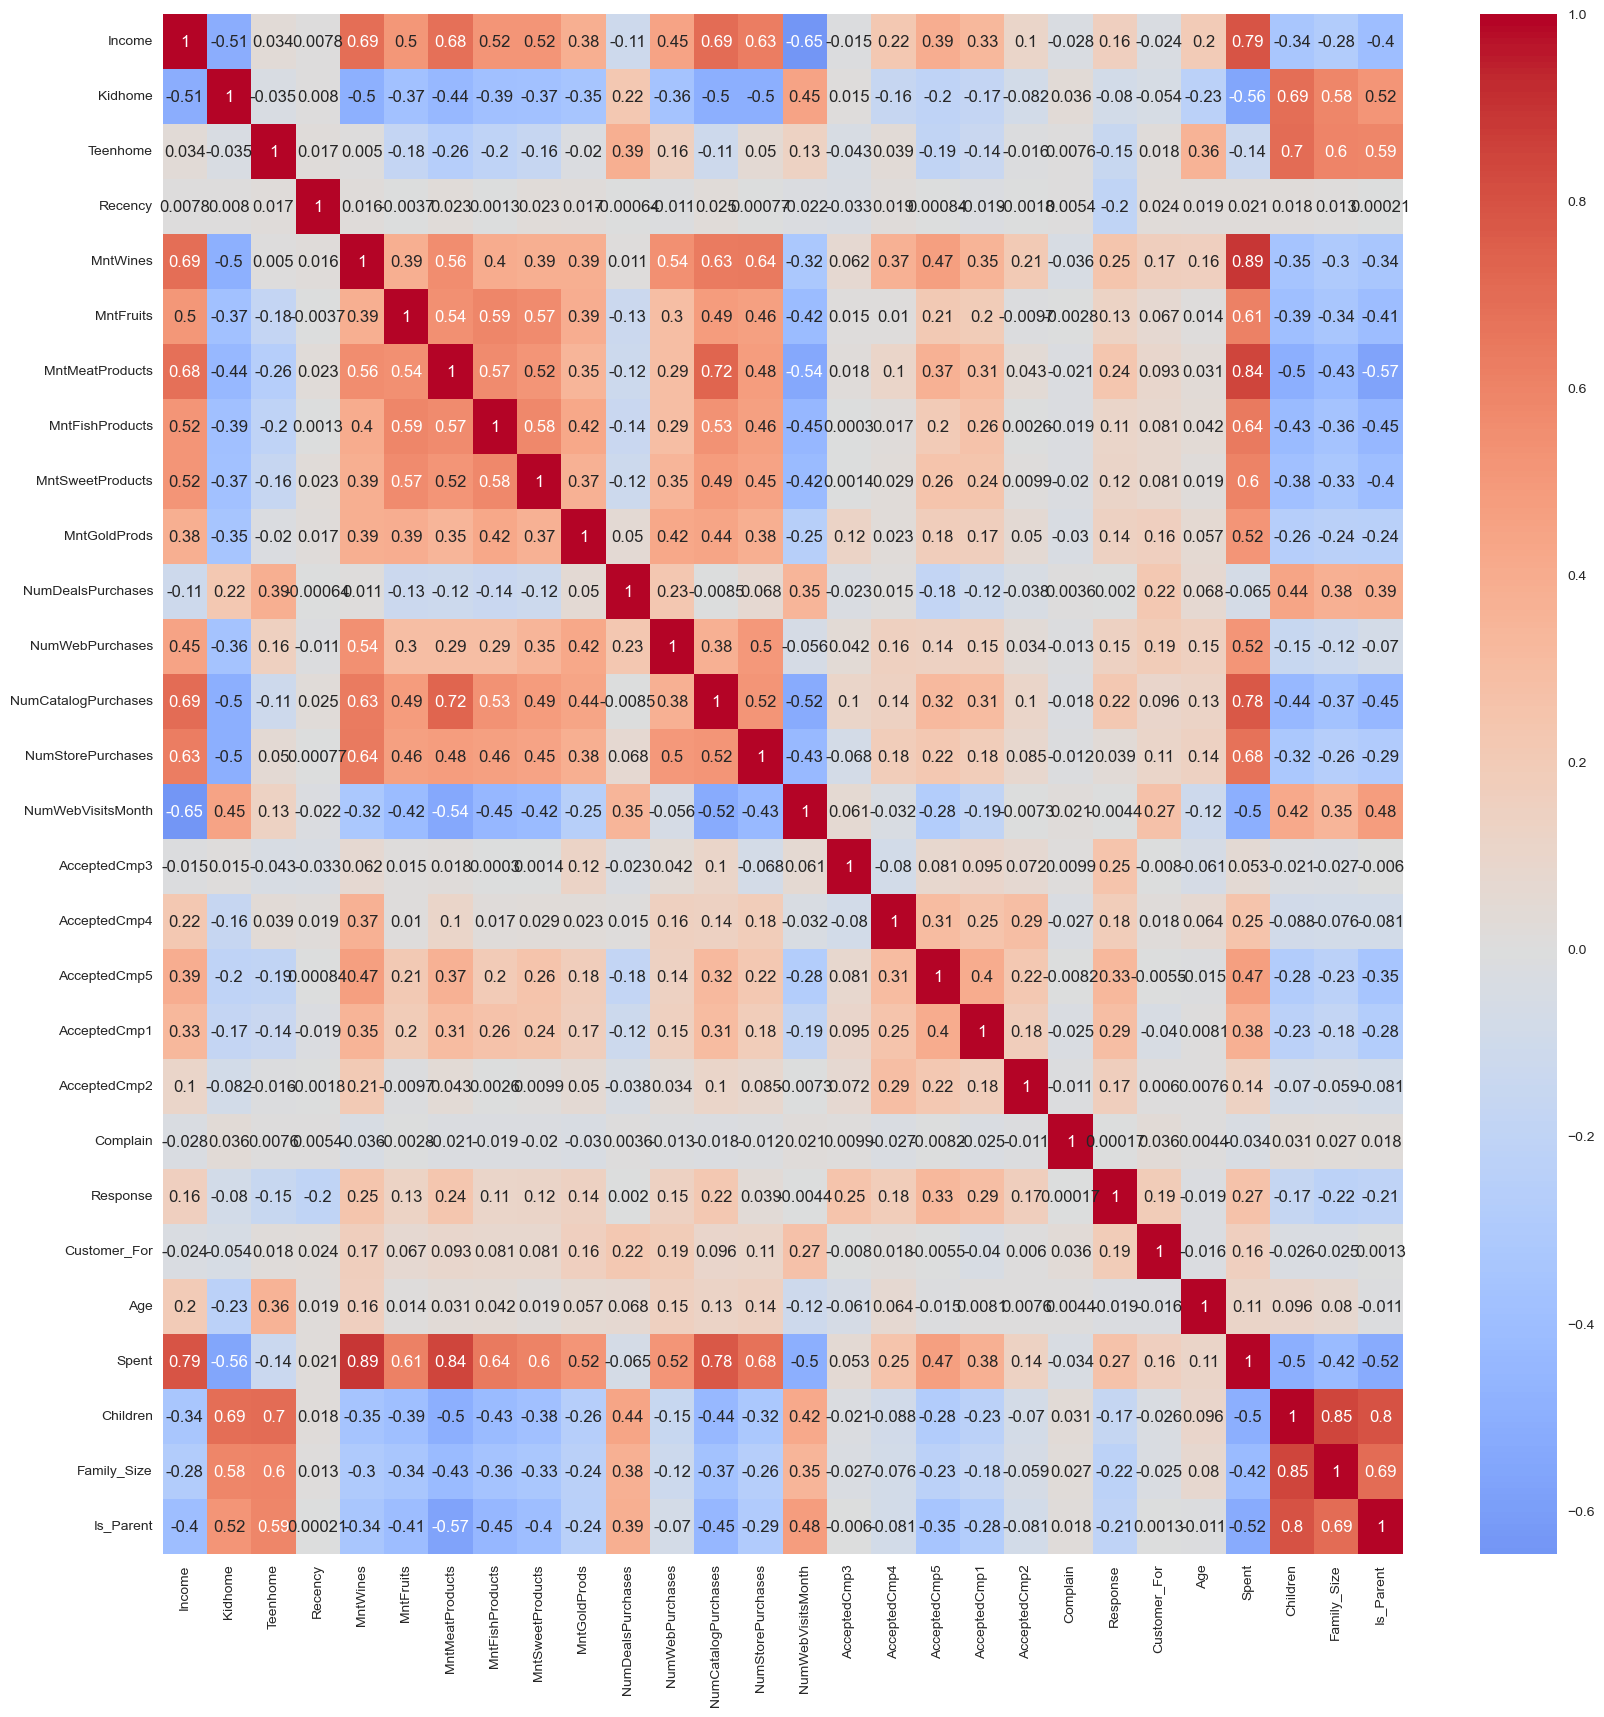

In [17]:
numeric_df = df.select_dtypes(include=[np.number])  # Numeric columns only
corr_mat = numeric_df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0)
plt.show()

#### Handling Categorical Variables

In [18]:
object_cols = (df.dtypes == 'object')
object_cols = list(object_cols[object_cols].index)

# Handle Categorical Variables (Non-Numeric Values) by Label encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

## Scaling Features and PCA

In [19]:
# Scaling the Data
df_s = df.copy()
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df_s = df_s.drop(cols_del, axis=1)

scaler = StandardScaler()
scaler.fit(df_s)
scaled_df = pd.DataFrame(scaler.transform(df_s), columns=df_s.columns)

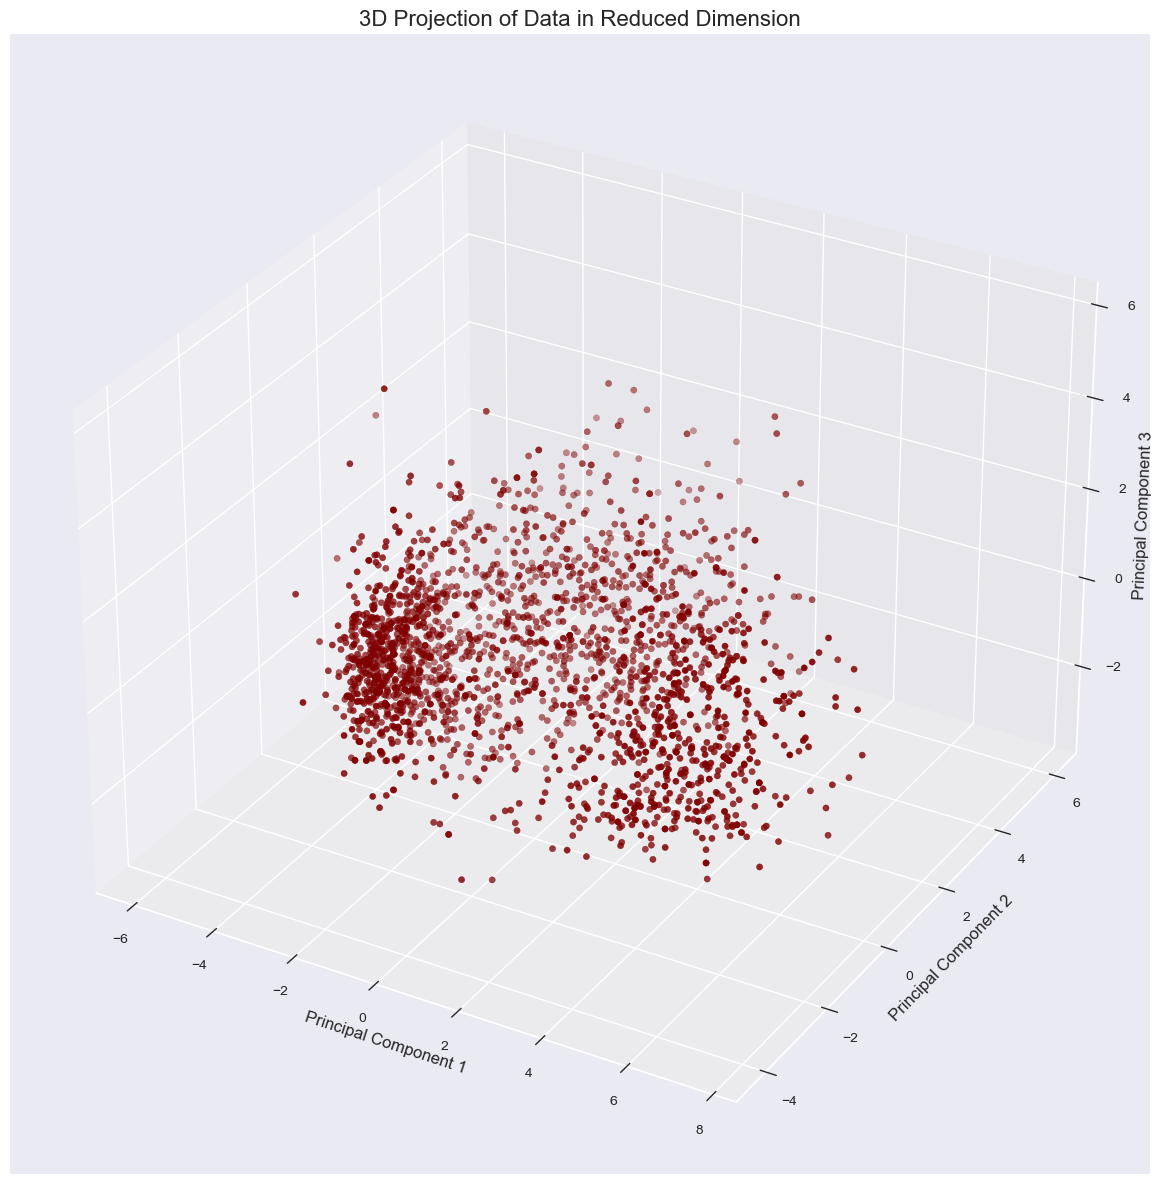

In [20]:
# Dimensionality Reduction using PCA

pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=["col1", "col2", "col3"])

# 3D plot for PCA results
x = PCA_df["col1"]
y = PCA_df["col2"]
z = PCA_df["col3"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("3D Projection of Data in Reduced Dimension", fontsize=16)
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_zlabel("Principal Component 3", fontsize=12)

plt.tight_layout()
plt.show()

## Clustering and Evaluation

In [21]:
# Using Agglomerative Clustering
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC

df["Clusters"] = yhat_AC

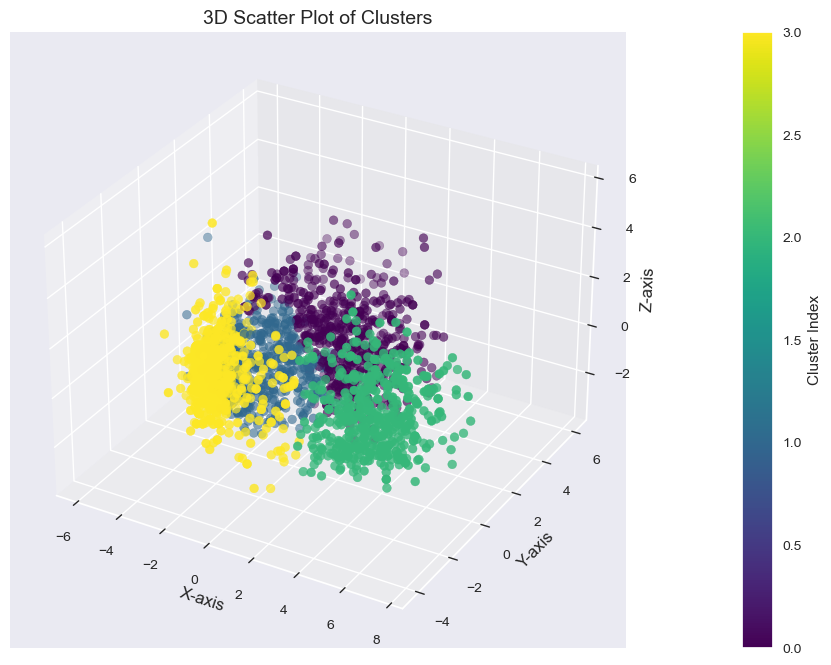

In [22]:
# Visualizing Clusters
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap='viridis')
ax.set_title("3D Scatter Plot of Clusters", fontsize=14)
ax.set_xlabel("X-axis", fontsize=12)
ax.set_ylabel("Y-axis", fontsize=12)
ax.set_zlabel("Z-axis", fontsize=12)

plt.colorbar(scatter, ax=ax, pad=0.1, label="Cluster Index")
plt.show()

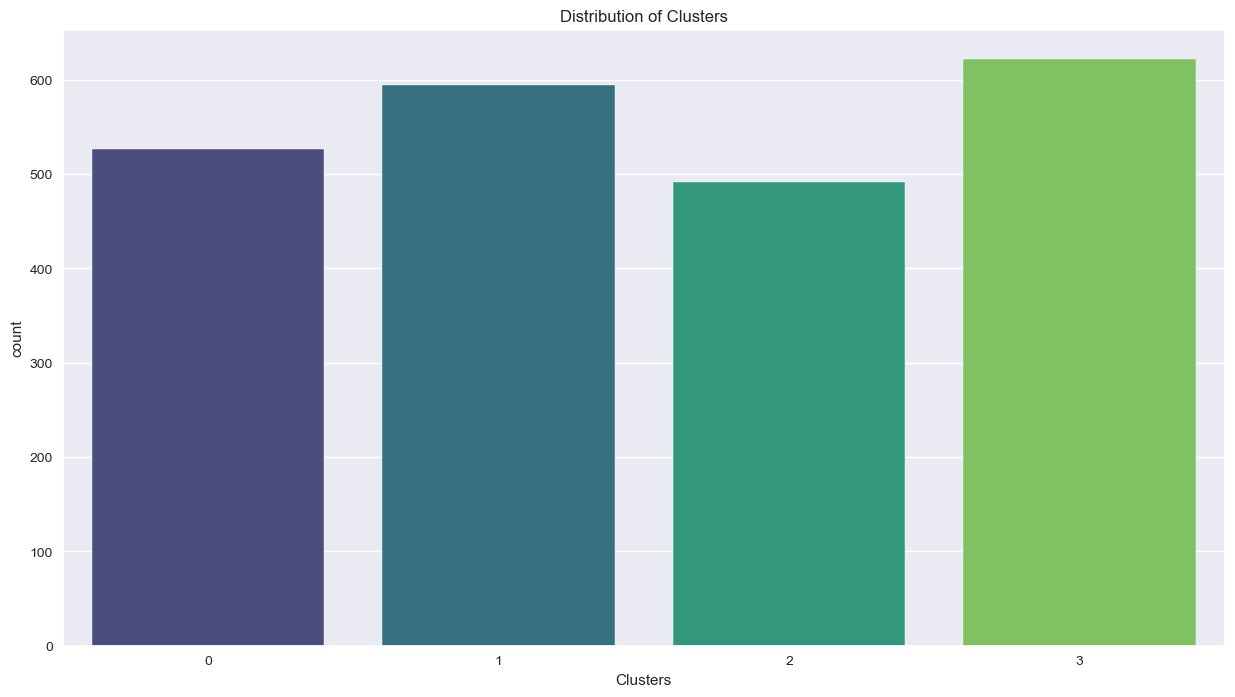

In [23]:
# Distribution of Clusters
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Clusters"], palette="viridis")
plt.title("Distribution of Clusters")
plt.show()

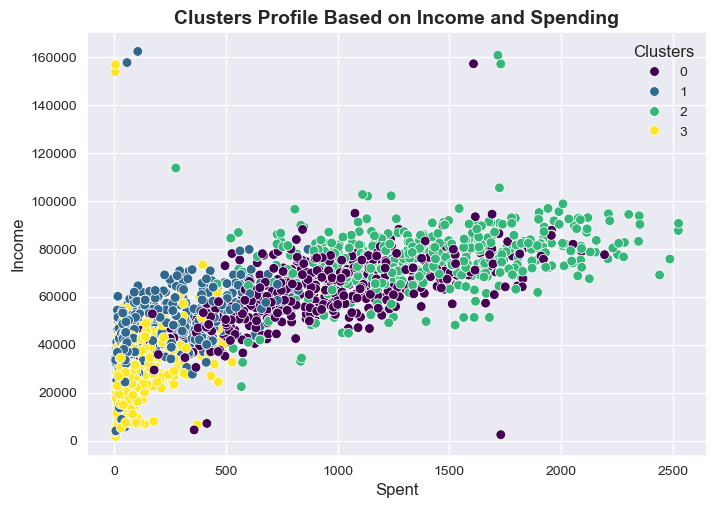

In [24]:
# Profiling the Clusters Based on Features
sns.scatterplot(data=df, x="Spent", y="Income", hue="Clusters", palette="viridis")
plt.title("Clusters Profile Based on Income and Spending", fontsize=14, fontweight='bold')
plt.xlabel("Spent", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.show()

**Key observations**: The dataset has been cleaned by handling missing values, converting data types, and creating relevant features. Clustering using PCA and Agglomerative Clustering has successfully segmented customers into four distinct groups based on their spending and income.

**Next steps**: You can now explore how these clusters behave differently with respect to other customer demographics and use these insights for targeted marketing campaigns.

To explore how the clusters behave differently with respect to other customer demographics and use these insights for targeted marketing campaigns, we need to profile each cluster by analyzing key customer demographic features such as age, education, family size, etc. This will help in identifying patterns within each cluster and guide decisions for tailored marketing strategies.

### 1. Cluster Profiling by Demographics**
We'll start by analyzing the clusters with respect to various customer demographics like age, education, marital status, family size, and more. This helps in identifying the unique characteristics of each cluster.

**Profiling Clusters Using Descriptive Statistics**
Calculate basic descriptive statistics (like mean, median, and standard deviation) for various demographic features within each cluster

In [25]:
# Descriptive statistics for each cluster
cluster_profiles = df.groupby("Clusters").agg({
    "Age": ["mean", "median", "std"],
    "Income": ["mean", "median", "std"],
    "Family_Size": ["mean", "median", "std"],
    "Spent": ["mean", "median", "std"],
    "Children": ["mean", "median", "std"]
})

cluster_profiles

Age                          Income                         \
               mean median        std          mean   median           std   
Clusters                                                                     
0         55.313093   54.0   9.470521  61465.260911  62058.0  13239.879124   
1         56.020168   56.0   9.397127  46164.839496  46086.0  14279.319383   
2         52.735772   52.0  14.177206  75580.908537  76276.0  12797.303099   
3         45.131833   44.0  10.057579  30739.495177  30132.0  13230.636102   

         Family_Size                         Spent                      \
                mean median       std         mean  median         std   
Clusters                                                                 
0           2.895636    3.0  0.654409   922.745731   900.0  399.945533   
1           3.369748    3.0  0.723180   212.705882   138.0  195.423142   
2           1.593496    2.0  0.491681  1385.434959  1364.5  431.530523   
3           2.393891    2.0  0.650154    97.274920    61.0  102.885628   

          Children                   
              mean median       std  
Clusters                             
0         1.242884    1.0  0.471449  
1         1.643697    2.0  0.617456  
2         0.010163    0.0  0.100398  
3         0.784566    1.0  0.463015

An overview of how each cluster differs with respect to age, income, spending, and other features

### 2. Visualizing Cluster Profiles
Visualize the relationships between clusters and key demographic features using bar plots, box plots, or scatter plots.

**absVisualizing Income vs. Spent by Clusters**
To see how income and spending vary across clusters, plot a scatter plot, where different clusters are color-coded.

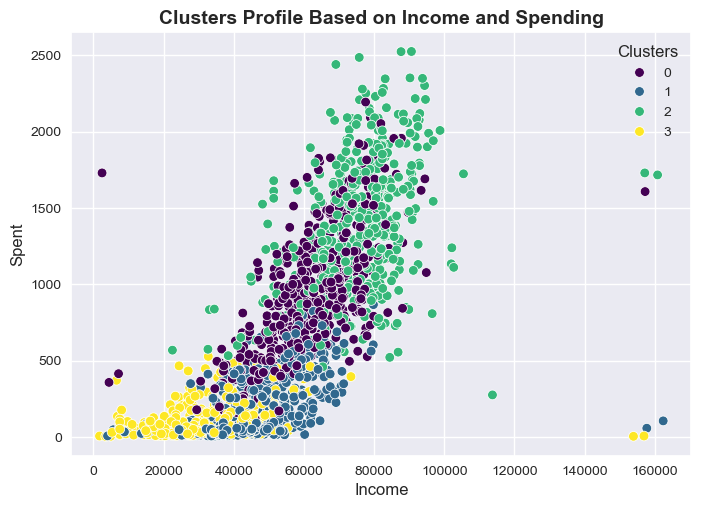

In [26]:
sns.scatterplot(data=df, x="Income", y="Spent", hue="Clusters", palette="viridis")
plt.title("Clusters Profile Based on Income and Spending", fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=12)
plt.ylabel("Spent", fontsize=12)
plt.show()

**Visualizing Age Distribution Across Clusters**

Visualize how age distribution varies across clusters using boxplots.

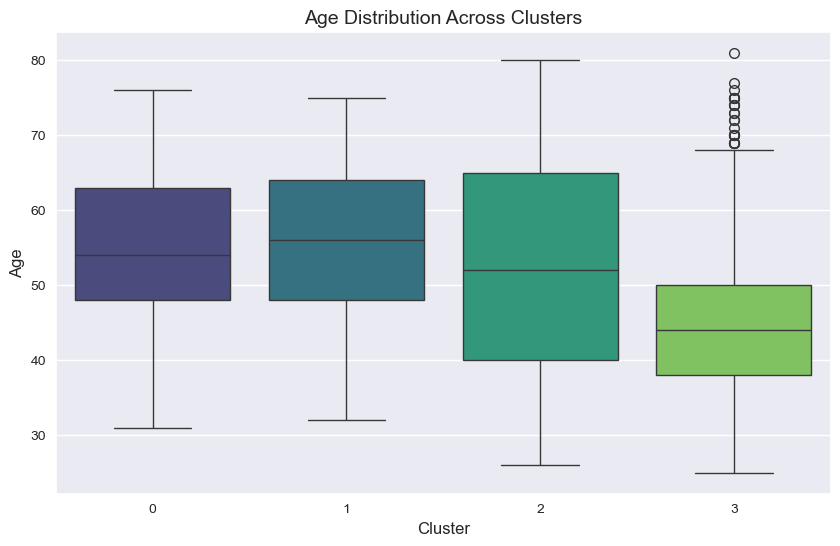

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Clusters", y="Age", data=df, palette="viridis")
plt.title("Age Distribution Across Clusters", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

### 3. Segmenting Clusters for Targeted Marketing
Once the clusters are profiled, you can segment them based on their unique characteristics and behavior for targeted marketing. For example, you can consider the following strategies:

**Cluster 1: High-Spending Young Adults**
If a cluster is young and spends a lot, a marketing strategy focused on luxury goods or trendy products may work best for this group.

**Cluster 2: Mid-Income Parents**
If a cluster consists of middle-income parents, promotions around family-oriented products or services might be more appealing.

**Cluster 3: Budget-Conscious Older Adults**
A cluster with older adults who spend less might respond well to discounts, loyalty programs, or promotions focused on essential products.

**Cluster 4: Single High-Income Professionals**
A cluster with high-income, single professionals might be best targeted with products related to professional growth, luxury, or exclusive services.

### 4. Targeted Marketing Strategy
Once the key characteristics of each cluster have been identifies, I can design targeted marketing campaigns by considering:

**Advertising Channels**: Certain age groups or family structures may prefer particular advertising channels like social media, email campaigns, or TV ads.
Product Recommendations: Suggesting products that match their spending patterns or life stage.
Personalized Offers: Offering discounts or rewards based on income level, family size, or spending behavior.

### 5. Visualization of Clusters with Demographics
You can visualize how clusters align with other demographic features using heatmaps, bar plots, or stacked bar charts. For example, you can create a heatmap that shows the relationship between clusters and other categorical features such as education and marital status.

6. Identifying Key Customer Demographics for Marketing
By analyzing these visualizations and statistical summaries, to identify key demographics for each cluster that will guide the design of more effective, tailored marketing campaigns.

## Preprocessing and Feature Selection
Data has been scaled using scaled_df, which is crucial for clustering. Before proceeding with clustering, ensure the m  the most relevant features are used. 

Here's how to structure feature selection:

- Analyze feature importance using random forests or tree-based models (which you've already done).
- Eliminate less important features.
- For PCA, select the top components that explain most of the variance.

## Clustering with KMeans
The KMeans model is already working well. 

Refining by tuning the number of clusters (k) and selecting the best cluster labels.

In [28]:
scaled_df.head(2)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.89438,0.288947,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,...,0.692865,-0.095001,2.386338,1.529793,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362
1,-0.89438,-0.262003,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,...,-0.131421,-0.095001,-0.419052,-1.191143,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169


In [29]:
# Best features for training
scaled_df = scaled_df[['Education', 'Income', 'Recency', 'Complain', 'Response', 'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent']]
scaled_df.head()

,Education,Income,Recency,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.89438,0.288947,0.306856,-0.095001,2.386338,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362
1,-0.89438,-0.262003,-0.383971,-0.095001,-0.419052,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169
2,-0.89438,0.918423,-0.798467,-0.095001,-0.419052,0.333146,0.282541,0.742041,-1.264308,-0.656596,-1.584362
3,-0.89438,-1.182183,-0.798467,-0.095001,-0.419052,-1.290693,-0.918994,0.742041,0.065416,0.445618,0.631169
4,0.57070,0.296187,1.550344,-0.095001,-0.419052,-1.034298,-0.305762,0.742041,0.065416,0.445618,0.631169


In [57]:
# Save to CSV
scaled_df.to_csv("cluster_profiles.csv", index=False)

In [30]:
# Refined KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to your dataset
df['Cluster'] = kmeans.labels_

# Silhouette score
silhouette = silhouette_score(scaled_df, kmeans.labels_)
print(f'Silhouette Score: {silhouette:.2f}')

Silhouette Score: 0.17


## Model Evaluation and Classification
- **Train a classifier** (e.g., Random Forest) to predict the clusters based on the features.

- Use metrics like **Adjusted Rand Index (ARI)**, **Normalized Mutual Information (NMI)**, and **Confusion Matrix** for evaluation.

- Once trained, save your model for future use.

In [31]:
# Split data into X and y
# Assuming scaled_df is the DataFrame that contains all your data
y = scaled_df['Response']  # Target variable (dependent variable)

# Feature matrix X (excluding the 'Response' column)
X = scaled_df.drop(columns=['Response'])

# Optionally, check the shapes to confirm the split
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (2236, 10)
y shape: (2236,)


In [32]:
# Splitting data into train and test sets
# Assuming X (features) and y (target/labels) are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train and test sets to verify the split
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1788, 10)
Test set shape: (448, 10)


In [33]:
# Applying KMeans clustering to the scaled data
kmeans_new = KMeans(n_clusters=4, random_state=1).fit(scaled_df)
# stability check
stability_score = adjusted_rand_score(kmeans.labels_, kmeans_new.labels_)
print(f"Cluster Stability Score: {stability_score}")

Cluster Stability Score: 0.5309713631775229


In [34]:
# Train the RandomForestClassifier on the training data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, kmeans.labels_[:len(X_train)])

RandomForestClassifier(random_state=42)

In [35]:
# Predict on the train and test data
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [36]:
# Output the predictions
print("Train predictions:", train_predictions)
print("Test predictions:", test_predictions)

Train predictions: [2 1 2 ... 0 0 0]
Test predictions: [1 0 2 0 1 2 0 1 0 2 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 2 1 0 0
 0 1 1 1 1 0 2 1 0 1 0 2 1 1 0 0 2 1 2 2 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0
 1 2 0 1 0 1 0 0 1 1 1 2 0 1 0 2 0 1 0 1 0 0 1 1 1 2 0 1 0 1 1 1 0 0 1 1 0
 0 1 1 2 1 1 1 1 1 1 0 1 2 0 1 1 2 0 0 2 1 1 1 1 1 0 0 0 0 1 0 1 0 1 2 0 1
 1 1 0 1 0 0 0 0 1 2 0 2 1 2 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1
 0 0 1 2 0 0 1 0 0 2 0 1 0 0 0 1 0 2 2 0 2 0 0 0 2 1 2 1 2 1 1 1 0 1 0 2 1
 2 1 1 0 1 1 0 1 1 0 0 0 1 1 2 0 2 1 0 1 1 1 1 0 1 0 1 1 2 1 2 1 0 2 0 0 0
 1 1 1 0 1 0 2 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 2 0 1 1 1 0 0 1 1 2 1 0 0 2 0
 0 1 1 0 1 1 1 1 0 2 0 0 2 2 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1
 1 0 1 0 0 0 0 1 1 0 2 2 1 1 0 1 0 1 1 0 0 2 1 0 1 0 1 0 1 0 0 2 0 1 0 1 1
 1 1 1 0 1 0 1 0 0 0 0 2 2 1 0 2 1 0 1 1 0 1 1 2 1 1 0 0 1 1 3 1 1 0 1 2 0
 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 2 1 0 1 0 1 1 0 1 1 0 0 0 2 0 1 1 2 2
 1 0 1 1]


In [37]:
# Evaluate the model using Adjusted Rand Index (ARI)
ari_train = adjusted_rand_score(kmeans.labels_[:len(X_train)], train_predictions)
ari_test = adjusted_rand_score(kmeans.labels_[len(X_train):], test_predictions)

# Print out the evaluation metrics
print("Adjusted Rand Index (Train):", ari_train)
print("Adjusted Rand Index (Test):", ari_test)

Adjusted Rand Index (Train): 0.8609093492192206
Adjusted Rand Index (Test): 0.004259499696807365


In [38]:
# Evaluate the model using Normalized Mutual Information (NMI)
nmi_train = normalized_mutual_info_score(kmeans.labels_[:len(X_train)], train_predictions)
nmi_test = normalized_mutual_info_score(kmeans.labels_[len(X_train):], test_predictions)

print("Normalized Mutual Information (Train):", nmi_train)
print("Normalized Mutual Information (Test):", nmi_test)

Normalized Mutual Information (Train): 0.7947378882967723
Normalized Mutual Information (Test): 0.013384295260405596


In [39]:
# Evaluate using Confusion Matrix
conf_matrix_train = confusion_matrix(kmeans.labels_[:len(X_train)], train_predictions)
conf_matrix_test = confusion_matrix(kmeans.labels_[len(X_train):], test_predictions)

print("\nConfusion Matrix (Train):\n", conf_matrix_train)
print("\nConfusion Matrix (Test):\n", conf_matrix_test)


Confusion Matrix (Train):
 [[630  15  17   0]
 [ 16 635  11   0]
 [ 17   9 421   0]
 [  2   1   0  14]]

Confusion Matrix (Test):
 [[63 76 21  0]
 [69 86 18  1]
 [54 40 17  0]
 [ 0  3  0  0]]


In [40]:
# Classification report for detailed insights on precision, recall, f1-score
print("\nClassification Report (Train):\n", classification_report(kmeans.labels_[:len(X_train)], train_predictions))


Classification Report (Train):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       662
           1       0.96      0.96      0.96       662
           2       0.94      0.94      0.94       447
           3       1.00      0.82      0.90        17

    accuracy                           0.95      1788
   macro avg       0.96      0.92      0.94      1788
weighted avg       0.95      0.95      0.95      1788



In [41]:
print("\nClassification Report (Test):\n", classification_report(kmeans.labels_[len(X_train):], test_predictions))


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.34      0.39      0.36       160
           1       0.42      0.49      0.45       174
           2       0.30      0.15      0.20       111
           3       0.00      0.00      0.00         3

    accuracy                           0.37       448
   macro avg       0.27      0.26      0.26       448
weighted avg       0.36      0.37      0.36       448



### Feature Importance

In [42]:
clf_f = RandomForestClassifier()
clf_f.fit(scaled_df, kmeans.labels_)

RandomForestClassifier()

In [43]:
# Get feature importance from the RandomForest model
feature_importance = clf_f.feature_importances_
feature_importance

array([0.00657105, 0.17234131, 0.02188801, 0.01834887, 0.00834854,
       0.06795759, 0.12243007, 0.10630941, 0.162259  , 0.18770323,
       0.12584291])

In [44]:
# Create a DataFrame to display the feature importance alongside the feature names
features = scaled_df.columns  # Assuming your original dataset's features are named
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

In [45]:
# Sort the importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

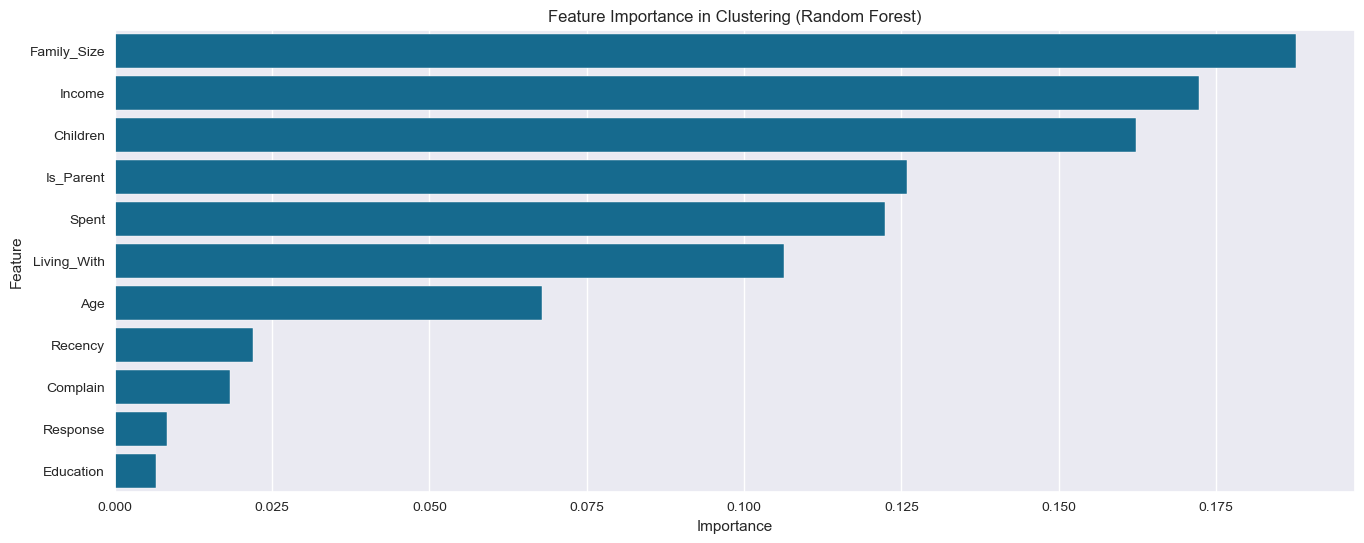

In [46]:
# Visualize the feature importance
# Plot the feature importance
plt.figure(figsize=(16, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Clustering (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [47]:
# Interpret the feature importance
# Print the sorted importance values
print("Feature Importance:\n")
print(importance_df)

Feature Importance:

        Feature  Importance
9   Family_Size    0.187703
1        Income    0.172341
8      Children    0.162259
10    Is_Parent    0.125843
6         Spent    0.122430
7   Living_With    0.106309
5           Age    0.067958
2       Recency    0.021888
3      Complain    0.018349
4      Response    0.008349
0     Education    0.006571


## Model Interpretation
Use SHAP values for feature importance and model interpretation. This will help explain which features are contributing to the clustering model's decisions.

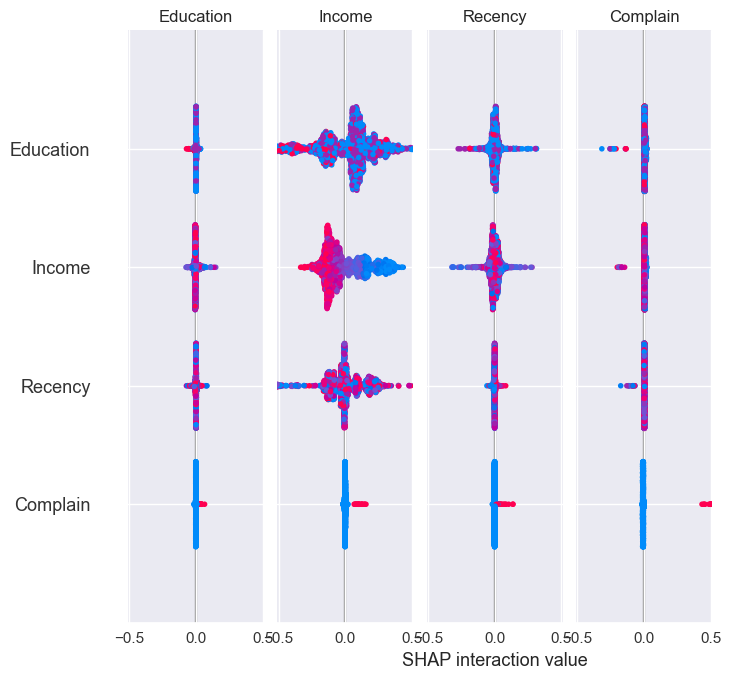

In [48]:
# Assuming you have a trained classifier 'clf_f'
explainer = shap.TreeExplainer(clf_f)
shap_values = explainer.shap_values(scaled_df)

# Visualize SHAP values
shap.summary_plot(shap_values, features=scaled_df, feature_names=scaled_df.columns)

###  Save the Model

In [49]:
# Saving the model
import joblib

# Save the trained KMeans and classifier model
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(clf, 'classifier_model.pkl')

['classifier_model.pkl']

In [50]:
# Load the saved model
kmeans = joblib.load('kmeans_model.pkl')
clf = joblib.load('classifier_model.pkl')

In [54]:
# Example data for prediction
new_data = [[-0.985345, -0.350141, 0.251004, 0.235696]]  # Replace with actual new data features

k_d = [[-0.89438,	0.288947,	0.306856,	-0.095001,	2.386338,	1.016868,	1.680176,	-1.347635,	-1.264308,	-1.758810,	-1.584362]]
cl_d = [[-0.89438,	0.288947,	0.306856,	-0.095001,	1.016868,	1.680176,	-1.347635,	-1.264308,	-1.758810,	-1.584362]]

# Predict the cluster
predicted_cluster = kmeans.predict(k_d)
print(f'Predicted Cluster: {predicted_cluster}')

Predicted Cluster: [2]


In [55]:
predicted_cluster = clf.predict(cl_d)
print(f'Predicted Cluster: {predicted_cluster}')

Predicted Cluster: [1]
